$
\DeclareMathOperator{\Prob}{Pr}
\renewcommand{\vec}[1]{{\underline{#1}}}
\newcommand{\dott}[2]{{{#1}^T{#2}}}
\newcommand{\mat}[1]{{\mathbf{#1}}}
$

# Programming Exercises - Set 1
This exercise set regards linear regression. You are given one one-dimensional data set **dataset1_linreg.py**. Please import the file to the notebook (click on the arrow on the right side of the screen to open a menu. In the menu, go to Files. Select upload and upload the dataset file to the colab. Now the file can be used in the notebook). We are going to use the *gradient descent* (GD) algorithm during all exercises. For each of the exercises you may have to adjust the number of iterations and the step size of the GD to get a good performance. One technique to verify if the GD is behaving properly is to plot the cost versus the number of iterations. For plotting we will use *matplotlib* library (and Python3). During implementation and debugging it is helpful to carefully observe the dimensions of the objects which enter/leave the calculations.

For code brevity, we are going to use slightly different notation than during the lecture. Instead of the separate bias term $b$ in the linear regression, i.e.,
\begin{align}
z & = \sum_{k=1}^{M} w_k x_k + b \\
& =  \dott{\vec{w}}{\vec{x}} + b,
\end{align}
we are going to replace $b$ with $w_0$ and store it inside the parameters vector $\vec{w}$. It may be conveninet to exted the data vector $\vec{x}$ by additional one for some calculations. That is, you may use the following notation
\begin{align}
z & = \sum_{k=1}^{M} w_k x_k + w_0 \\
&=
\begin{bmatrix}
w_0 w_1 \dots w_M 
\end{bmatrix}
\begin{bmatrix}
1 \\
x_1 \\
\vdots \\
x_M \\
\end{bmatrix} \\
& =  \dott{\vec{w}}{\vec{x}}.
\end{align}
The inputs in the dataset are organized as a matrix:
\begin{align}
\begin{bmatrix}
&\vec{x}_1 &\dots &\vec{x}_N
\end{bmatrix},
\end{align}
and the output in the dataset are organized as a matrix: 
\begin{align}
\begin{bmatrix}
&y_1 &\dots &y_N
\end{bmatrix}.
\end{align}

## Problem 1 - Linear Regression
We start from importing the data set and ploting the data points. The problem we aim to solve is linear regression. That is, we want to develop a model for predicting the values $y \in \mathcal{R}$ from the data $x \in \mathcal{R}$. The plot presents also the ground truth, that is, the function from which the training samples were generated (samples also contain extra noise).

[[0.29467 0.53059 0.19152 0.0679  0.78699 0.65633 0.63752 0.5756  0.03906 0.35781]]


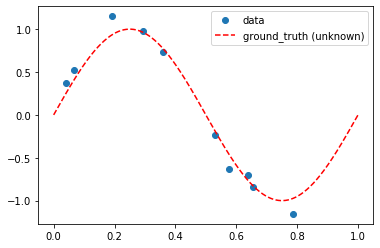

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from dataset1_linreg import DataSet

#import data, plot data
y_D, x_D = DataSet.get_data()
DataSet.plot_data()


1. Initialize a variable `w` which contains the model parameters. `w` should be a numpy array of dimensions (2,1), i.e., a column vector. `w[0][0]` $= w_0$ and `w[1][0]` $= w_1$.  Use $w_0 = w_1 = 0.1$. (you can use the `type` method and `shape` property of numpy array to check if the variavble is of the expected type and shape)

In [0]:
# w = ...


2. Implement a function `predict_y1`, which takes an array of inputs $[x_1 \dots x_n]$ and produces an array of correspoding outputs $[a(x_1) \dots a(x_n)]$. Use the model $a(x) =w_1x+w_0$. The input is a numpy array of size $(M=1,n)$ and the output is a numpy array of size $(1,n)$. In the function you can use the global variable `w` containing the model parameters (from the previous point). In this case, the model will be automaticly updated when the value of `w` changes.

In [0]:
def predict_y1(x_arr):
  # a = ... 
  
  
  return a 

We plot the implemented model. If everything went right you should obtain the line $y=0.1x+0.1$ representing the model.




In [0]:
DataSet.plot_model(predict_y1)


3. Implement a function `l2_cost` computing the quadratic cost for a given model. The inputs to the function are: `x_arr` = a numpy array of size $(1,n)$ containing inputs to the model; `y_arr` = a numpy array of size $(1,n)$ containing the correspoding outputs from the data set; `predict_f` = a function handle which represents the model (eg. a function `predict_y1`).

In [0]:
def l2_cost(x_arr, y_arr, predict_f):
    
    a = predict_f(x_arr)
    cost = 0.5 * np.sum( (a-y_arr)**2 )    
    
    return cost

We compute cost for the initialized model. (the cost should be around $3.36$ or of a similar magnitude if you used a different scaling than $0.5$ for the cost function).

In [0]:
print('cost: %.3f' % l2_cost(x_D, y_D, predict_y1))  

4. Compute the gradient for the current set of parameters. The gradient should be a vector of the same size as the vector `w` and should contain partial derivatives for the correspoding parameters. When correctly implemented you should obtain a vector $\nabla  w \approx [1.229, 2.231]^T$ (or something parallel if you used a different scaling than  0.5  for the cost function).

In [0]:
# grad_w = ...

print(grad_w)

5. Implement the gradient descent. You have to update `w` iterativley using the computed gradients. Note that `w` is a global variable used in the predicting function. Thus updating `w` automatically updates the predicting function. Use learning rate $\approx 0.01$ and $\approx 1000$ update steps.


In [0]:
#for i in range(1000):
  # ...
  # w = w - 0.01 * grad_w

We plot the model and compute the cost. Expected cost: $\approx 0.87$.

In [0]:
DataSet.plot_model(predict_y1)
print('Cost:%f' % l2_cost(x_D, y_D, predict_y1))

## Problem 2 - Data Normalization

In this exercise we extend the precious model by data normalization. Assume we have the data matrix (our matrix is $1 \times N$ but here we consider the more general case $M \times N$)
\begin{align}
\mat{X}_{\text{data}} = 
\begin{bmatrix}
&x_{(1),1} 	&\dots 	&x_{(1),N} 	\\
&x_{(2),1} 	&\dots 	&x_{(2),N} 	\\
&\vdots &\dots  &\vdots\\
&x_{(M),1} 	&\dots 	&x_{(M),N} 	\\
\end{bmatrix}
\end{align}
The notation we use is as follows: $x_{(j),i}$ is a $j$-th entry in the $i$-th vector $\vec{x}_i$from the data set. Each of the rows corresponds to a samples from different input variables $X_{(1)}, \dots, X_{(M)}$. That is, we consider each entry in the vector  of input variables from the training set as being a different scalar variable. E.g., the second row of $\mat{X}_{\text{data}}$ contains the samples from the variable $X_{(2)}$, that is, the second entry of training data vector. Each of the variables $X_{(i)}$ may have different mean and variance. This may lead to overflow/underflow in computations as well as makes GD converge slower. A common approach in machine learning is to normalize the variables $X_{(1)}, \dots, X_{(M)}$. This can be done by computing the mean $\mu_i$ and the variance $\sigma^2_i$ (or the standard deviation denoted by $\sigma_i$ ) of each of the variables and transforming the variables in the following way
\begin{align}
X_{(i)} \gets \frac{X_{(i)} - \mu_i}{\sigma_i}.
\end{align}
This way each of the new variables has zero mean and unit variance. 

The normalization in our case can be performed by computing the mean and the variance of each row from $\mat{X}_{\text{data}}$ and  applying the normalization transformation to each of the samples in the row. After training the model with the normalized data, if we want to apply the model to new data, we need to perform the same normalization (with means and variances computed on the training data). That is, first we transform $\vec{x}_\text{new}$ just as we transformed all our training data. Next, we perform prediction on the transformed version of $\vec{x}_\text{new}$.

Observe, that once we compute the mean and the variance for the training data, the data normalization is just a linear transformation of the input variables. Although it does not change the model capabilities, it is often used in practice as it speeds up the training.

1. Implement a fuction which computes and returns the mean value and the standard deviaton for each input variable (row of the data matrx) and returns them. The input is an numpy array of size $(M,n)$. The outputs are two numpy arrays of size $(M,1)$.

In [0]:
def get_norm_params(x_data):
    mean_x = np.mean(x_data, axis=1).reshape((-1,1))
    stdd_x = np.std(x_data,axis=1).reshape((-1,1))
  
    return mean_x, stdd_x

We compute the normalization parameters for our dataset. We will store them as global variables and use them in the predictive function (just as the variable `w` is used). The mean should be around 0.414 and the stdd 0.248.

In [11]:
x_D_mean, x_D_stdd = get_norm_params(x_D)
print('mean:%.3f, stdd:%.3f' % (x_D_mean, x_D_stdd))

mean:0.414, stdd:0.248


2. Implement a function `predict_y1n`, which takes an array of inputs $[x_1 \dots x_n]$ and produces an array of correspoding outputs $[a(x_1) \dots a(x_n)]$. Use the model $a(x) =w_1x+w_0$. However,  now perform the data normalization before using the model. Normalize the input using the global variables coputed from the training data: `x_D_mean, x_D_stdd`.The input to the function is a numpy array of size $(M,n)$ and the output is a numpy array of size $(1,n)$. In the function you can use the global variable `w` containing the model parameters (from the previous point). In this case, the model will be automaticly updated when the value of `w` changes.

In [0]:
def predict_y1n(x):
    x_nor = (x - x_D_mean)/x_D_stdd
    a = w[1][0]*x_nor + w[0][0]
    
    
    return a

3. Compute the gradient for the initial parameters (you can re-run the cell from above which initializes  w, or just copy here the code from there)). Remeber to use the normalization. The gradient should be a vector of the same size as to the vector `w` and should contain partial derivatives for the correspoding parameters. When correctly implemented you should obtain a vector $\nabla  w = [0.81, 7.69]^T$ (for $w=[0.1, 0.1]^T$.

In [25]:
w = np.array([0.1,0.1]).reshape((-1,1))
x_Nor = (x_D - x_D_mean)/x_D_stdd

x_Train = np.vstack((np.ones((1,x_Nor.shape[1])), x_Nor))
a = predict_y1n(x_D)

grad_w = x_Train.dot( (a-y_D).T )

print(grad_w)

[[0.81526]
 [7.69727]]


4. Implement the gradient descent. You have to update `w` iterativley using the computed gradients. Note that `w` is a global variable for the prediciton function and updating `w` autmatically updates the predictive model. Apply normalization to the data before using them for training. Use learning rate $\approx 0.01$ and $\approx 1000$ update steps.


In [0]:
w = np.array([0.1,0.1]).reshape((-1,1))
x_Nor = (x_D - x_D_mean)/x_D_stdd
x_Train = np.vstack((np.ones((1,x_Nor.shape[1])), x_Nor))



for i in range(1000):
    a = predict_y1n(x_D)
    grad_w = x_Train.dot( (a-y_D).T )
    w = w - 0.01 * grad_w


We now plot the model and compute the cost. Expected cost: $\approx 0.87$

Cost:0.874386


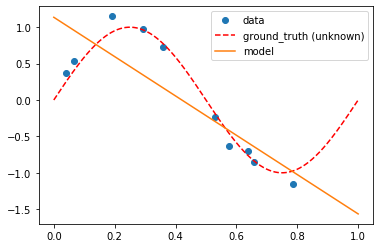

In [31]:
DataSet.plot_model(predict_y1n)
print('Cost:%f' % l2_cost(x_D, y_D, predict_y1n))

## Problem 3 - Linear Models for Non-linear Functions
In this exercise we work with the previous dataset but we will extend our model to include non-linear functions of the input data. Observe, that so far our model was only able to reliably approxiatmate linear functions. The idea presented in this part of the tutorial is a powerful technique which greatly improves  the variety of the functions which can be approximated. For this approach the data normalization is quite helpful. Otherwise GD may be inefficient.

We will extend the model by introducing new input variables, which are functions of our base input variable. Recall that inputs in our data set are 
\begin{align}
\mat{X}_{\text{data}} = 
\begin{bmatrix}
&x_1 	&\dots 	&x_N 	\\
\end{bmatrix}.
\end{align}

To make the model richer we introduce polynomial functions of the base data as new variables. We artifically build a new data set as follows:
\begin{align}
\mat{X}_{\text{data}} = 
\begin{bmatrix}
&x_1 	&\dots 	&x_N 	\\
&x_1^2&\dots 	&x_N^2 	\\
&\vdots &\dots 	&\vdots 	\\
&x_1^P&\dots 	&x_N^P 	\\
\end{bmatrix}.
\end{align}

We treat each row of the newly created dataset as a new variable and perform regression accordingly. Consequently, the parameters vector `w` shound now contain $P+1$ entries (one extra for the bias parameter $w_0$).

1. Implement the function `extend_data1D` which takes as an input the numpy array of size $(1,n)$, e.g., the base array $X_\text{data}$, and returns  the extended array of size  $(p,n)$ as explained above.  

In [0]:
def extend_data1D(x, p=1): 
    
    x_ext = np.vstack([ x**i for i in range(1,p+1) ])
    
    return x_ext

We set $P=4$ (feel free to try different values as well). We compute the normalization parameters for the extended dataset. You should get `x_D_ext_mean` $= [0.41, 0.23, 0.14, 0.09]^T$ and x_D_ext_stdd $= [0.24, 0.20, 0.15, 0.11]^T$

In [40]:
P = 4
x_D_ext = extend_data1D(x_D, P)
x_D_ext_mean, x_D_ext_stdd = get_norm_params(x_D_ext)

print(x_D_ext_mean)
print(x_D_ext_stdd)

[[0.4138 ]
 [0.23271]
 [0.14481]
 [0.09487]]
[[0.24795]
 [0.20178]
 [0.15376]
 [0.11727]]


2. Implement a function `predict_y2`, which takes an array of inputs $[x_1 \dots x_n]$ and produces an array of correspoding outputs $[a(x_1) \dots a(x_n)]$. Use the model $a(x) = \sum_{i=0}^P w_i x^i$ (you can use the extend function to generate terms $x^i, i>1$). Apply the data normalization before using the model. Normalize the inputs (which include the newly generated functions of the base input) using the global variables `x_D_ext_mean, x_D_ext_stdd`.The input is a numpy array of size $(M=1,n)$ and the output is a numpy array of size $(1,n)$. In the function you can use the global variable `w` containing the model parameters (from the previous point). In this case, the model will be automaticly updated when the value of `w` changes.

In [0]:
def predict_y2(x):
    x = extend_data1D(x, P)
    x_D_ext_norm = (x - x_D_ext_mean)/x_D_ext_stdd
    a = w[0][0] + w[1:].T.dot(x_D_ext_norm)
    
    return a

We initialize the value of the parametes and plot the implemented model. It does not fit the data but it is clearly non-linear, which showes that the model is more representative.

Cost:6.711965


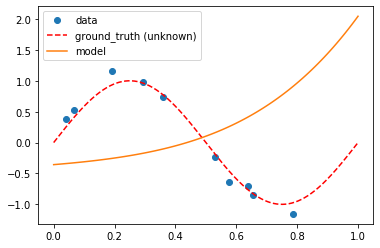

In [53]:
w = np.array([0.1]*(P+1)).reshape(-1,1)

DataSet.plot_model(predict_y2)
print('Cost:%f' % l2_cost(x_D, y_D, predict_y2))



3. Compute the gradient for the current set of parameters. Remeber to use the normalization. The gradient should be a vector of the same size as to the vector `w` and should contain partial derivatives for the correspoding parameters. When correctly implemented you should obtain a vector $\nabla  w = [0.81, 10.44, 11.15, 11.05, 10.63]^T$ (or anyting parallel if you used different scaling used for the cost function)

In [60]:
x_D_ext_norm = (x_D_ext - x_D_ext_mean)/x_D_ext_stdd
x_D_train = np.vstack((np.ones((1,x_D_ext_norm.shape[1])), x_D_ext_norm))
m = predict_y2(x_D)

grad_w = x_D_train.dot((m-y_D).T)

print(grad_w)

[[ 0.81526]
 [10.44346]
 [11.15544]
 [11.05384]
 [10.63789]]


4. Implement gradient descent. You have to update `w` iterativley using the computed gradients. Note that `w` is a global variable for the prediciton function and updating `w` autmatically updates the predictive model. Apply normalization to the data before using them for training. Use learning rate $\approx 0.01$ and $\approx 20000$ update steps.

In [0]:
x_D_ext_norm = (x_D_ext - x_D_ext_mean)/x_D_ext_stdd
x_D_train = np.vstack((np.ones((1,x_D_ext_norm.shape[1])), x_D_ext_norm))

for i in range(20000):
    m = predict_y2(x_D)
    grad_w = x_D_train.dot((m-y_D).T)
    w = w - 0.01 * grad_w

We now plot the model and compute the cost. Expected cost: $\approx 0.03$

Cost:0.028514


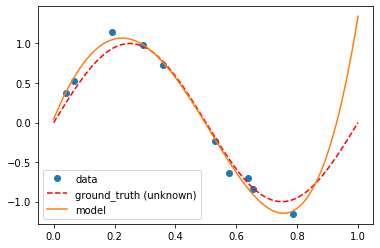

In [65]:
DataSet.plot_model(predict_y2)
print('Cost:%f' % l2_cost(x_D, y_D, predict_y2))

For linear models we can create new input variables by appling functions to the base input variables. Next, we treat the newly generated variables as regular ones and perform the regression. This technique allows to represent non-linear functions at the cost of more complicated model (more parameters to find, larger extended dataset). The problem is still linear because of the linear dependence on the parameters $w$. The optimization problem is still convex (if the cost function is convex) and  we are able to find the optimum `w` by using GD. One problem with the presented approach is that it requires expert-aided choice of the functions. For different regression problems, e.g., housing prices, speech processing, different functions may result in good peredicions. This choice of the function requires expertise in the domain of the problem.

## Problem 4* - Non-linear Model Based on Sine Functions

This problem contains different dataset for indepedent solving. We import the dataset dataset2_linreg.py and plot the data points. (Please upload the dataset file to the notebook)

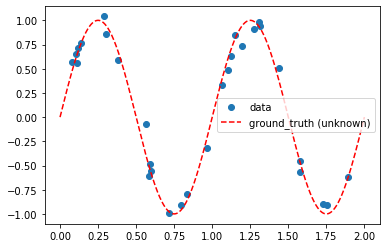

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from dataset2_linreg import DataSet

#import data, plot data
y_D, x_D = DataSet.get_data()
DataSet.plot_data()

Use the trick from the previous problem to extend the data as follows:
\begin{align}
	\mat{X}_{\text{data}} = 
	\begin{bmatrix}
	&x_1 					&\dots 	&x_N 		\\
	&\sin 2\pi\frac{x_1}{x_{\text{max}}} 			&\dots 	&\sin 2\pi\frac{x_N}{x_{\text{max}}} \\
	&\vdots 			&		&\vdots \\
	&\sin 2\pi(P-1)\frac{x_1}{x_{\text{max}}} 	&\dots 	&\sin 2\pi(P-1)\frac{x_N}{x_{\text{max}}}\\
	&\sin 2\pi P \frac{x_1}{x_{\text{max}}} 	&\dots 	&\sin 2\pi P \frac{x_N}{x_{\text{max}}}\\
	\end{bmatrix},
	\end{align}
	where $x_{\text{max}}$ is the sample from the training data with maximum value.

1. Implement the function which generates the extra input variables, implement the predictive model, and train the model. Find the appropriate learning rate and number of interations. Remeber to use the data normlaization. Plot the final model.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


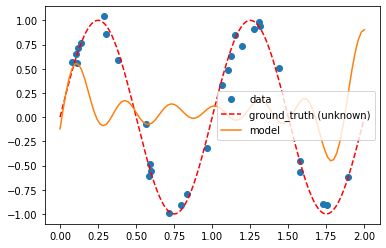

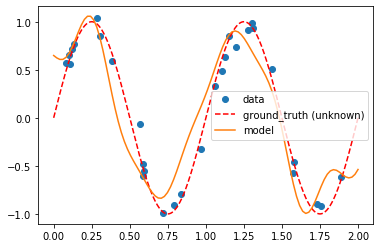

Cost:0.675430


In [84]:
P = 6

def extend_data1D_sine(x, p=1):
    x_max = max(max(x_D))
    x_ext = np.vstack(( np.sin(2*np.pi*i*x/x_max) for i in range(1,p+1) ))
    x_ext = np.vstack((x,x_ext))
    return x_ext 

x_D_exte = extend_data1D_sine(x_D, P)
x_D_ext_meane, x_D_ext_stdde = get_norm_params(x_D_exte)

w = np.array([0.1]*(P+2)).reshape(-1,1)

def predict_y3(x):
    x = extend_data1D_sine(x, P)
    x = (x - x_D_ext_meane)/x_D_ext_stdde
    #x = np.vstack(( np.ones((1, x.shape[1])), x ))
    #a = w.T.dot(x)
    a = w[0][0] + w[1:].T.dot(x)
    return a

DataSet.plot_model(predict_y3)
plt.show()

x_traine = (x_D_exte - x_D_ext_meane)/x_D_ext_stdde
x_traine = np.vstack(( np.ones((1, x_traine.shape[1])),x_traine))

for i in range(10000):
    n = predict_y3(x_D)
    grad_w = x_traine.dot((n-y_D).T)
    w = w - 0.01*grad_w

DataSet.plot_model(predict_y3)
plt.show()

print('Cost:%f' % l2_cost(x_D, y_D, predict_y3)) 
  